<a href="https://colab.research.google.com/github/ShreyanshPandey1177/Face_Mask_Detection_Using_CNN/blob/master/Face_Mask_Detection_Using_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install Kaggle

In [6]:
import os

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Check if kaggle.json exists before attempting to copy and set permissions
if os.path.exists('kaggle.json'):
  # Copy the kaggle.json file
  !cp kaggle.json ~/.kaggle/
  # Set the permissions of the kaggle.json file
  !chmod 600 ~/.kaggle/kaggle.json
  print("kaggle.json found and permissions set.")
else:
  print("kaggle.json not found in the current directory. Please upload kaggle.json to your Colab environment.")

kaggle.json found and permissions set.


Importing Face Mask Dataset



In [7]:
#API  to fetch the dataset from Kaggle
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 85% 138M/163M [00:00<00:00, 1.44GB/s]
100% 163M/163M [00:00<00:00, 1.31GB/s]


In [8]:
#extracting the  Compressed Dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

data		       kaggle.json  WithMask.png
face-mask-dataset.zip  sample_data  WithoutMask.png


## **Importing the Dependencies **

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split



In [11]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3434.jpg', 'with_mask_2950.jpg', 'with_mask_623.jpg', 'with_mask_1265.jpg', 'with_mask_1450.jpg']
['with_mask_761.jpg', 'with_mask_3619.jpg', 'with_mask_1664.jpg', 'with_mask_2375.jpg', 'with_mask_3629.jpg']


In [12]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1396.jpg', 'without_mask_2432.jpg', 'without_mask_295.jpg', 'without_mask_1901.jpg', 'without_mask_480.jpg']
['without_mask_2031.jpg', 'without_mask_3675.jpg', 'without_mask_371.jpg', 'without_mask_1705.jpg', 'without_mask_3089.jpg']


In [13]:
print('Number of With Mask Images:',len(with_mask_files))
print('Number of Without Mask Images:',len(without_mask_files))

Number of With Mask Images: 3725
Number of Without Mask Images: 3828


# Creating Label for Two class of Images
*   with mask-->1
*  without mask-->0





In [14]:
#creat the labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828



In [15]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
label=with_mask_labels+without_mask_labels
print(label[0:5])
print(label[-5:])
print(len(label))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


Displaying the images

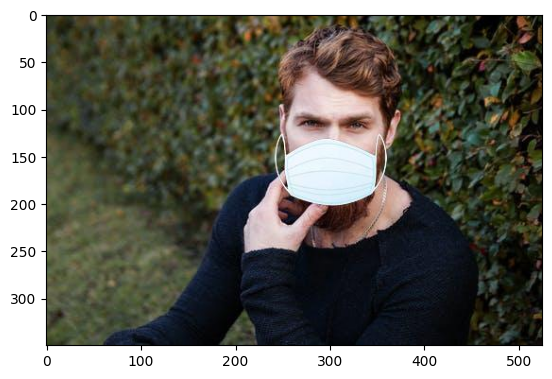

In [18]:
#displaying with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()


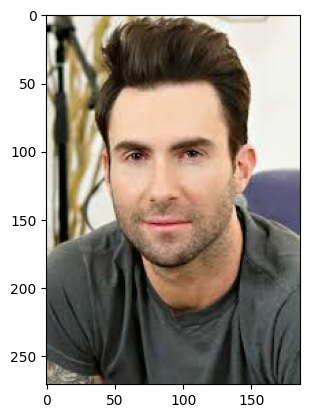

In [19]:
#displaying without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2900.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing

*    Resize the Images
*  Convert The Images To Numpy Arrays



In [20]:
#Convert images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
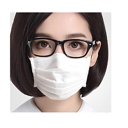

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
#convering Image List and label list to numpy arrays
X=np.array(data)
Y=np.array(label)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
#Scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255


array([[[ 68,  62,  74],
        [ 68,  62,  75],
        [ 69,  63,  78],
        ...,
        [ 57,  51,  65],
        [ 57,  51,  65],
        [ 57,  51,  65]],

       [[ 68,  62,  74],
        [ 69,  64,  76],
        [ 68,  64,  76],
        ...,
        [ 58,  52,  66],
        [ 58,  52,  66],
        [ 57,  51,  65]],

       [[ 69,  64,  76],
        [ 69,  65,  76],
        [ 68,  65,  76],
        ...,
        [ 59,  53,  67],
        [ 58,  52,  66],
        [ 58,  52,  66]],

       ...,

       [[134, 138, 147],
        [138, 142, 151],
        [142, 146, 155],
        ...,
        [ 97,  96, 104],
        [ 96,  95, 103],
        [ 95,  92, 101]],

       [[134, 138, 147],
        [139, 143, 152],
        [141, 146, 155],
        ...,
        [ 97,  95, 106],
        [ 95,  94, 103],
        [ 95,  93, 101]],

       [[134, 138, 146],
        [139, 143, 151],
        [141, 146, 155],
        ...,
        [ 98,  96, 107],
        [ 95,  94, 103],
        [ 94,  93, 101]]], dtype=uint8)
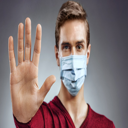

In [34]:
X_train[0]

In [35]:
X_train_scaled[0]

array([[[0.26666667, 0.24313725, 0.29019608],
        [0.26666667, 0.24313725, 0.29411765],
        [0.27058824, 0.24705882, 0.30588235],
        ...,
        [0.22352941, 0.2       , 0.25490196],
        [0.22352941, 0.2       , 0.25490196],
        [0.22352941, 0.2       , 0.25490196]],

       [[0.26666667, 0.24313725, 0.29019608],
        [0.27058824, 0.25098039, 0.29803922],
        [0.26666667, 0.25098039, 0.29803922],
        ...,
        [0.22745098, 0.20392157, 0.25882353],
        [0.22745098, 0.20392157, 0.25882353],
        [0.22352941, 0.2       , 0.25490196]],

       [[0.27058824, 0.25098039, 0.29803922],
        [0.27058824, 0.25490196, 0.29803922],
        [0.26666667, 0.25490196, 0.29803922],
        ...,
        [0.23137255, 0.20784314, 0.2627451 ],
        [0.22745098, 0.20392157, 0.25882353],
        [0.22745098, 0.20392157, 0.25882353]],

       ...,

       [[0.5254902 , 0.54117647, 0.57647059],
        [0.54117647, 0.55686275, 0.59215686],
        [0.55686275, 0

Building A Convolution Neural Network

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
number_of_classes=2

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes,activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#Compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [39]:
#training the neural Network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 772ms/step - acc: 0.6828 - loss: 0.6954 - val_acc: 0.8860 - val_loss: 0.2798
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 780ms/step - acc: 0.8900 - loss: 0.2825 - val_acc: 0.9058 - val_loss: 0.2376
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 780ms/step - acc: 0.9215 - loss: 0.2061 - val_acc: 0.8876 - val_loss: 0.2927
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 760ms/step - acc: 0.9365 - loss: 0.1740 - val_acc: 0.9074 - val_loss: 0.2633
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 760ms/step - acc: 0.9506 - loss: 0.1447 - val_acc: 0.9157 - val_loss: 0.2244


Model Evaluation

In [40]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy=',accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - acc: 0.9302 - loss: 0.1701
Test Accuracy= 0.9265387058258057


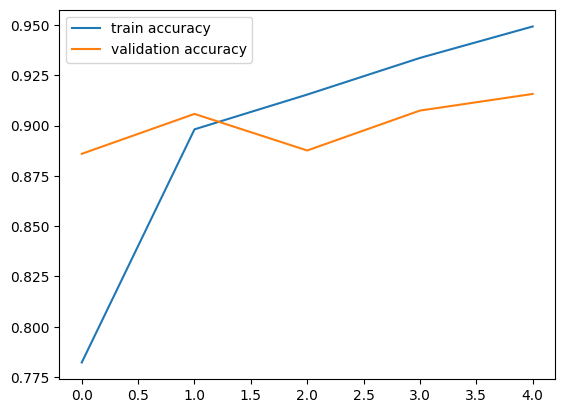

In [41]:
h=history

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predictive System


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from tensorflow import keras

# Placeholder model definition - run the training cells for the actual model
number_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(number_of_classes,activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


input_img_path=input('Enter the path of the image to be tested:')

if not os.path.exists(input_img_path):
  print(f"Error: File not found at {input_img_path}")
else:
  input_img=cv2.imread(input_img_path)
  cv2_imshow(input_img)
  input_img_resize=cv2.resize(input_img,(128,128))
  input_img_scaled=input_img_resize/255
  input_img_reshaped=np.reshape(input_img_scaled,[1,128,128,3])
  input_prediction=model.predict(input_img_reshaped)
  print(input_prediction)
  input_pred_label=np.argmax(input_prediction)
  print(input_pred_label)
  if input_pred_label==0:
    print('The person in the image is not wearing a mask')
  else:
    print('The person in the image is  wearing a mask')

# Task
The Kaggle API key is required to download the dataset. Please upload your `kaggle.json` file to your Colab environment.

## Upload kaggle api key

### Subtask:
Guide the user to upload their `kaggle.json` file to their Colab environment.


## Configure kaggle api

### Subtask:
Provide code to create the `.kaggle` directory and copy the `kaggle.json` file into it with the correct permissions.


**Reasoning**:
Create the .kaggle directory, copy the kaggle.json file, and set the permissions.



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Download dataset

### Subtask:
Provide code to download the dataset from Kaggle using the API.


**Reasoning**:
Download the dataset from Kaggle using the specified slug.



In [ ]:
!kaggle datasets download omkargurav/face-mask-dataset

## Extract dataset

### Subtask:
Provide code to extract the downloaded zip file.


**Reasoning**:
Provide code to extract the downloaded zip file using the zipfile module.



In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

## Verify extraction

### Subtask:
Verify extraction by listing the contents of the extracted directory to confirm the dataset is available.


**Reasoning**:
List the contents of the `/content/data` directory to verify if the dataset was extracted successfully.



In [ ]:
!ls /content/data

## Configure kaggle api

### Subtask:
Retry: Provide code to create the `.kaggle` directory and copy the `kaggle.json` file into it with the correct permissions.


**Reasoning**:
Re-attempt to create the .kaggle directory, copy the kaggle.json file, and set its permissions, including a check for the file's existence.



In [ ]:
import os

# Re-attempt to create the .kaggle directory
!mkdir -p ~/.kaggle

# Check if kaggle.json exists before attempting to copy and set permissions
if os.path.exists('kaggle.json'):
  # Re-attempt to copy the kaggle.json file
  !cp kaggle.json ~/.kaggle/
  # Re-attempt to set the permissions of the kaggle.json file
  !chmod 600 ~/.kaggle/kaggle.json
  print("kaggle.json found and permissions set.")
else:
  print("kaggle.json not found in the current directory. Cannot configure Kaggle API.")

## Download dataset

### Subtask:
Retry: Provide code to download the dataset from Kaggle using the API.


**Reasoning**:
Attempt to download the dataset using the Kaggle API command.



In [ ]:
!kaggle datasets download omkargurav/face-mask-dataset

## Extract dataset

### Subtask:
Retry: Provide code to extract the downloaded zip file.


**Reasoning**:
The previous attempt to extract the dataset failed because the zip file was not found. Since the download also failed, the file is still likely missing. However, the instructions are to retry the extraction code.



In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
try:
  with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')
except FileNotFoundError:
  print(f"Error: The dataset file {dataset} was not found. Please ensure it has been downloaded successfully.")

## Summary:

### Data Analysis Key Findings

*   The core issue throughout the process was the inability to successfully download the dataset from Kaggle.
*   Attempts to configure the Kaggle API by creating the required directory and copying the `kaggle.json` file failed because the `kaggle.json` file was not found in the environment.
*   Consequently, the Kaggle API was not properly configured, leading to a `KeyError: 'username'` when trying to download the dataset.
*   Due to the failed download, subsequent steps to extract and verify the dataset also failed with `FileNotFoundError` and "No such file or directory" errors, respectively, as the dataset file was not present.

### Insights or Next Steps

*   Ensure the `kaggle.json` file is correctly uploaded and accessible in the environment before attempting any Kaggle API operations.
*   Verify the location of the uploaded `kaggle.json` file and modify the script accordingly to point to the correct file path for copying and permission setting.
